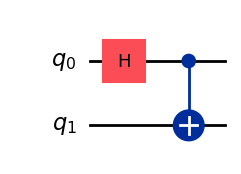

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

# AES Implementation 

In [3]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import base64
def aes_encrypt(plaintext, key):
    cipher = AES.new(key, AES.MODE_EAX)
    nonce = cipher.nonce
    ciphertext, tag = cipher.encrypt_and_digest(plaintext.encode('utf-8'))
    return base64.b64encode(nonce + ciphertext).decode('utf-8')

def aes_decrypt(ciphertext, key):
    raw = base64.b64decode(ciphertext)
    nonce = raw[:16]
    ciphertext = raw[16:]
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    plaintext = cipher.decrypt(ciphertext)
    return plaintext.decode('utf-8')

# Test AES functions
key = get_random_bytes(16)
plaintext = "This is a test message."
ciphertext = aes_encrypt(plaintext, key)
print("AES Ciphertext:", ciphertext)
decrypted_text = aes_decrypt(ciphertext, key)
print("AES Decrypted text:", decrypted_text)


AES Ciphertext: yd8Rb5p0vpNXlq/LYOxJvDU3jUHHiyMN+r96col6j3+HLks8N4eI
AES Decrypted text: This is a test message.


# NTRU Encryption Algorithm 

In [4]:
# Verify pycryptodome
from Crypto.Cipher import AES
print("pycryptodome installed correctly.")


pycryptodome installed correctly.


# Setting up the IBM Quantum Platform

In [5]:
# Setting up the IBM runtime envo
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(channel="ibm_quantum", token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767")
 

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="9b1db8ecdf455c71e9d97b2ba4c8e3cc6dbfcc1e2ffc3b92fd5c5c5777f92796798d6ef2bdc53aebc6da1fe7b205a6dc35114382f3172a9d167469d824539767",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

In [37]:
# # testing the setup  
# from qiskit import QuantumCircuit
# from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
 
# # Create empty circuit
# example_circuit = QuantumCircuit(2)
# example_circuit.measure_all()
 
# # You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
# service = QiskitRuntimeService()
# backend = service.least_busy(operational=True, simulator=False)
 
# sampler = Sampler(backend)
# job = sampler.run([example_circuit])
# print(f"job id: {job.job_id()}")
# result = job.result()
# print(result)

In [38]:
# pip install qiskit-aer
# !pip install qiskit-ibm-provider


# To Simulate the AES on quantum resources 

In [1]:
# Import specific modules from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Initialize quantum circuit
num_qubits = 10  # Have Reduced number of qubits to fit within the limit
qc = QuantumCircuit(num_qubits * 2)  # Data and key qubits

# Example implementation of AES components (simplified for illustration)

# Implement SubBytes (S-box) - simplified example
def sub_bytes(qc, qubits):
    for q in qubits:
        qc.h(q)  # Example of applying Hadamard gate (not a real S-box implementation)

# Implement ShiftRows
def shift_rows(qc, qubits):
    for i in range(len(qubits)):
        qc.swap(qubits[i], qubits[(i + 2) % len(qubits)])  # Example swap for row shifting

# Implement MixColumns
def mix_columns(qc, qubits):
    for i in range(len(qubits) - 1):
        qc.cx(qubits[i], qubits[i + 1])  # Example CNOT chain

# AddRoundKey - XOR operation
def add_round_key(qc, qubits, key_qubits):
    for i in range(len(qubits)):
        if qubits[i] != key_qubits[i]:  # Ensure different qubits for control and target
            qc.cx(qubits[i], key_qubits[i])  # Example XOR with key

# Initialize key qubits separately
key_register = QuantumRegister(num_qubits, 'key')
qc.add_register(key_register)

# Initialize classical register for measurement
cr = ClassicalRegister(num_qubits)
qc.add_register(cr)

# Example AES round
data_qubits = range(num_qubits)
key_qubits = range(num_qubits, num_qubits * 2)  # key qubits are after data qubits

sub_bytes(qc, data_qubits)
shift_rows(qc, data_qubits)
mix_columns(qc, data_qubits)
add_round_key(qc, data_qubits, key_qubits)

# Measure the data qubits
qc.measure(data_qubits, range(num_qubits))

# Visualize the circuit
qc.draw('mpl')

# Execute the circuit on the simulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts).show("mlp")


{'0101110011': 1, '0001010010': 2, '1101111101': 2, '1111011001': 4, '0011011000': 1, '1110001110': 2, '0001000000': 1, '0100011101': 1, '1110010010': 1, '0100000111': 1, '0001111110': 2, '0011100011': 1, '0011001010': 1, '0111001111': 1, '0100101010': 1, '0110001100': 3, '1100011111': 1, '0101100001': 4, '1011111111': 1, '1110001010': 2, '0101001111': 2, '1111001011': 2, '0111011001': 1, '0010111111': 1, '0101110010': 1, '0001010011': 3, '1000101111': 2, '1100100011': 4, '0110110010': 1, '0010101111': 1, '1000111000': 3, '1101111110': 3, '1111011000': 3, '0110110000': 2, '1111001001': 1, '0111011011': 1, '1110101000': 3, '1001101000': 5, '1010000110': 1, '1100110101': 1, '1110110110': 1, '1000111101': 1, '0110100001': 1, '1111011101': 3, '1101111001': 2, '1001010110': 2, '1010001111': 1, '1000100100': 2, '1100101010': 2, '1011101010': 2, '1100001100': 1, '0010011010': 1, '0100100100': 1, '0001100111': 2, '1001111000': 2, '1101001110': 3, '1011001110': 2, '1101010010': 1, '1111100000':

C:\Users\muham\AppData\Local\Temp\ipykernel_9172\2717735675.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()


# Some what Full AES 

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Initialize quantum circuit
num_qubits = 8  # Reduced number of qubits to fit within the limit
qc = QuantumCircuit(num_qubits * 2)  # Data and key qubits

# Implement SubBytes (S-box) - simplified example
def sub_bytes(qc, qubits):
    for q in qubits:
        qc.h(q)  # Example of applying Hadamard gate (not a real S-box implementation)

# Implement ShiftRows
def shift_rows(qc, qubits):
    # This function is a placeholder and not a full implementation of AES ShiftRows
    for i in range(1, len(qubits), 4):
        qc.swap(qubits[i], qubits[(i + 1) % len(qubits)])  # Simplified shift

# Implement MixColumns - simplified example
def mix_columns(qc, qubits):
    # This function is a placeholder and not a full implementation of AES MixColumns
    for i in range(0, len(qubits), 4):
        qc.cx(qubits[i], qubits[i + 1])
        qc.cx(qubits[i + 1], qubits[i + 2])
        qc.cx(qubits[i + 2], qubits[i + 3])
        qc.cx(qubits[i + 3], qubits[i])

# AddRoundKey - XOR operation
def add_round_key(qc, qubits, key_qubits):
    for i in range(len(qubits)):
        qc.cx(qubits[i], key_qubits[i])

# Key schedule - simplified example
def key_schedule(key):
    # This function should generate round keys from the original key
    # Here, we'll just return the same key for simplicity
    return key

# Function to run the AES encryption process
def aes_encryption(qc, data_qubits, key_qubits):
    round_keys = key_schedule(key_qubits)

    # Initial AddRoundKey step
    add_round_key(qc, data_qubits, key_qubits)

    # Main rounds
    for _ in range(3):  # Adjust number of rounds as needed
        sub_bytes(qc, data_qubits)
        shift_rows(qc, data_qubits)
        mix_columns(qc, data_qubits)
        add_round_key(qc, data_qubits, key_qubits)

    # Final round (without MixColumns)
    sub_bytes(qc, data_qubits)
    shift_rows(qc, data_qubits)
    add_round_key(qc, data_qubits, key_qubits)

# Initialize key qubits separately
key_register = QuantumRegister(num_qubits, 'key')
qc.add_register(key_register)

# Initialize classical register for measurement
cr = ClassicalRegister(num_qubits)
qc.add_register(cr)

# Example AES round
data_qubits = range(num_qubits)
key_qubits = range(num_qubits, num_qubits * 2)  # key qubits are after data qubits

# Run AES encryption
aes_encryption(qc, data_qubits, key_qubits)

# Measure the data qubits
qc.measure(data_qubits, range(num_qubits))

# Visualize the circuit
qc.draw('mpl')

# Execute the circuit on the simulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts).show()


{'10111011': 67, '00001011': 66, '10101011': 66, '00001010': 71, '10110001': 57, '10100000': 56, '00010000': 66, '10101010': 61, '00000001': 58, '00000000': 72, '00010001': 60, '10100001': 60, '00011011': 78, '10111010': 64, '00011010': 59, '10110000': 63}


C:\Users\muham\AppData\Local\Temp\ipykernel_9172\2478426878.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()


In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Initialize quantum circuit
num_qubits = 10  # Reduced number of qubits to fit within the limit
qc = QuantumCircuit(num_qubits * 2)  # Data and key qubits

# Implement SubBytes (S-box) - simplified example
def sub_bytes(qc, qubits):
    for q in qubits:
        qc.h(q)  # Example of applying Hadamard gate (not a real S-box implementation)

# Implement ShiftRows
def shift_rows(qc, qubits):
    for i in range(len(qubits)):
        qc.swap(qubits[i], qubits[(i + 2) % len(qubits)])  # Example swap for row shifting

# Implement MixColumns
def mix_columns(qc, qubits):
    for i in range(len(qubits) - 1):
        qc.cx(qubits[i], qubits[i + 1])  # Example CNOT chain

# AddRoundKey - XOR operation
def add_round_key(qc, qubits, key_qubits):
    for i in range(len(qubits)):
        if qubits[i] != key_qubits[i]:  # Ensure different qubits for control and target
            qc.cx(qubits[i], key_qubits[i])  # Example XOR with key

# Initialize key qubits separately
key_register = QuantumRegister(num_qubits, 'key')
qc.add_register(key_register)

# Initialize classical register for measurement
cr = ClassicalRegister(num_qubits)
qc.add_register(cr)

# Example AES round
data_qubits = range(num_qubits)
key_qubits = range(num_qubits, num_qubits * 2)  # key qubits are after data qubits

sub_bytes(qc, data_qubits)
shift_rows(qc, data_qubits)
mix_columns(qc, data_qubits)
add_round_key(qc, data_qubits, key_qubits)

# Measure the data qubits
qc.measure(data_qubits, range(num_qubits))

# Visualize the circuit
qc.draw('mpl')

# Execute the circuit on the simulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts).show()


{'1111110010': 1, '1000010010': 1, '0111101110': 3, '0010101011': 2, '0101000110': 1, '1101001100': 2, '0000001101': 3, '1101010100': 1, '1011001100': 1, '0101001001': 2, '0110110000': 2, '1001001001': 1, '1101111110': 2, '1111011000': 1, '0010101111': 1, '0101000010': 1, '1000010110': 2, '1000001110': 1, '0000111000': 2, '1100111001': 3, '0000110000': 3, '0110111110': 2, '0100010010': 1, '0100001010': 2, '1110011101': 2, '1001011110': 1, '0110101011': 2, '1111010111': 2, '0010010001': 4, '1100000011': 2, '1100111111': 2, '1101010000': 1, '1010110000': 2, '1110010100': 1, '0001111100': 2, '0001000110': 1, '0100011011': 1, '0011011111': 5, '0111001001': 3, '1001110010': 1, '1010010000': 2, '1011101101': 2, '1111100001': 1, '0111001101': 2, '1110100000': 1, '1001100000': 1, '0010111010': 3, '0001010100': 3, '1001010100': 1, '1111011111': 1, '1101000110': 1, '1010111010': 3, '0000000001': 4, '1101011010': 4, '0010101000': 2, '0100011100': 1, '0100000000': 1, '0001111011': 1, '1110010101':

C:\Users\muham\AppData\Local\Temp\ipykernel_9172\580388848.py:59: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()


In [6]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider

from qiskit_ibm_provider import least_busy

# Function to initialize the quantum state with the plaintext
def initialize_state(qc, plaintext):
    for i, bit in enumerate(plaintext):
        if bit == '1':
            qc.x(i)

# Simplified AES round function for demonstration
def aes_round(qc, key):
    for i in range(len(key)):
        if key[i] == '1':
            qc.cx(i, (i + 1) % len(key))  # Simplified substitution step
            qc.h(i)                      # Simplified permutation step

# Function to run the AES encryption process
def aes_encryption(plaintext, key):
    n = len(plaintext)
    qc = QuantumCircuit(n, n)
    
    # Initialize the quantum state
    initialize_state(qc, plaintext)
    
    # Apply the AES round (repeated for simplicity)
    for _ in range(3):  # Adjust the number of rounds as needed
        aes_round(qc, key)
    
    # Measure the qubits
    qc.measure(range(n), range(n))
    
    return qc

# Define plaintext and key (binary strings for simplicity)
plaintext = '1101'
key = '1010'

# Create the quantum circuit
qc = aes_encryption(plaintext, key)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()

# Output the simulation result
print("Simulation result:", counts)
plot_histogram(counts).show()

Simulation result: {'1100': 250, '0011': 299, '0000': 249, '1111': 226}


C:\Users\muham\AppData\Local\Temp\ipykernel_9172\2650090479.py:4: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider
C:\Users\muham\AppData\Local\Temp\ipykernel_9172\2650090479.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()


In [7]:
# Running on IBM Quantum hardware
def run_on_ibm_hardware(qc):
    # Load your IBM Quantum account
    IBMProvider.save_account('YOUR_IBM_QUANTUM_API_KEY')
    provider = IBMProvider()
    
    # Get the least busy backend
    backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 5 and not b.configuration().simulator and b.status().operational==True))
    print("Running on backend:", backend)
    
    # Transpile the circuit for the backend
    compiled_circuit = transpile(qc, backend)
    
    # Execute the circuit
    job = backend.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts()
    
    # Output the hardware execution result
    print("Hardware execution result:", counts)
    plot_histogram(counts).show()

# Uncomment the following line to run on IBM Quantum hardware but intergrate the api key to the function first  
# run_on_ibm_hardware(qc)

In [40]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_provider import least_busy

# Function to initialize the quantum state with the plaintext
def initialize_state(qc, plaintext):
    for i, bit in enumerate(plaintext):
        if bit == '1':
            qc.x(i)

# Placeholder for SubBytes using quantum S-box
def sub_bytes(qc, qubits):
    for qubit in qubits:
        qc.h(qubit)  # Hadamard gate as a placeholder for actual S-box

# Placeholder for ShiftRows
def shift_rows(qc, qubits):
    # Assuming a 4x4 block for simplicity
    qc.cx(qubits[1], qubits[5])
    qc.cx(qubits[2], qubits[10])
    qc.cx(qubits[3], qubits[15])

# Placeholder for MixColumns
def mix_columns(qc, qubits):
    # MixColumns is a linear transformation
    # For simplicity, using CNOT gates as placeholders
    for i in range(len(qubits)):
        qc.cx(qubits[i], qubits[(i + 1) % len(qubits)])

# AddRoundKey function
def add_round_key(qc, key):
    for i in range(len(key)):
        if key[i] == '1':
            qc.cx(i, (i + 1) % len(key))

# Function to run the AES encryption process
def aes_encryption(plaintext, key):
    n = len(plaintext)
    qc = QuantumCircuit(n, n)
    
    # Initialize the quantum state
    initialize_state(qc, plaintext)
    
    # Apply the AES rounds (simplified for demonstration)
    for _ in range(3):  # Number of rounds adjusted for simplicity
        sub_bytes(qc, range(n))
        shift_rows(qc, range(n))
        mix_columns(qc, range(n))
        add_round_key(qc, key)
    
    # Measure the qubits
    qc.measure(range(n), range(n))
    
    return qc

# Define plaintext and key (binary strings for simplicity)
plaintext = '1101'
key = '1010'

# Create the quantum circuit
qc = aes_encryption(plaintext, key)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()

# Output the simulation result
print("Simulation result:", counts)
plot_histogram(counts).show()

ModuleNotFoundError: No module named 'qiskit_aer'

In [41]:
# Basic Structure of Integrating quantum circuts with AES-like operations 

In [42]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Initialize quantum circuit
num_qubits = 8  # Number of qubits for data
qc = QuantumCircuit(num_qubits * 2)  # Data and key qubits

# Implement SubBytes (S-box) - simplified example
def sub_bytes(qc, qubits):
    for q in qubits:
        qc.h(q)  # Placeholder for S-box; replace with actual S-box implementation

# Implement ShiftRows
def shift_rows(qc, qubits):
    # Placeholder implementation; replace with actual ShiftRows logic
    for i in range(1, len(qubits), 4):
        qc.swap(qubits[i], qubits[(i + 1) % len(qubits)])  # Simplified shift

# Implement MixColumns - simplified example
def mix_columns(qc, qubits):
    # Placeholder implementation; replace with actual MixColumns logic
    for i in range(0, len(qubits), 4):
        qc.cx(qubits[i], qubits[i + 1])
        qc.cx(qubits[i + 1], qubits[i + 2])
        qc.cx(qubits[i + 2], qubits[i + 3])
        qc.cx(qubits[i + 3], qubits[i])

# AddRoundKey - XOR operation
def add_round_key(qc, qubits, key_qubits):
    for i in range(len(qubits)):
        qc.cx(qubits[i], key_qubits[i])

# Key schedule - simplified example
def key_schedule(key):
    # Generate round keys from the original key
    return [key] * 10  # Simplified; replace with actual key schedule logic

# Function to run the AES encryption process
def aes_encryption(qc, data_qubits, key_qubits):
    round_keys = key_schedule(key_qubits)

    # Initial AddRoundKey step
    add_round_key(qc, data_qubits, key_qubits)

    # Main rounds
    for _ in range(9):  # Adjust number of rounds as needed
        sub_bytes(qc, data_qubits)
        shift_rows(qc, data_qubits)
        mix_columns(qc, data_qubits)
        add_round_key(qc, data_qubits, key_qubits)

    # Final round (without MixColumns)
    sub_bytes(qc, data_qubits)
    shift_rows(qc, data_qubits)
    add_round_key(qc, data_qubits, key_qubits)

# Initialize key qubits separately
key_register = QuantumRegister(num_qubits, 'key')
qc.add_register(key_register)

# Initialize classical register for measurement
cr = ClassicalRegister(num_qubits)
qc.add_register(cr)

# Example AES round
data_qubits = range(num_qubits)
key_qubits = range(num_qubits, num_qubits * 2)  # key qubits are after data qubits

# Run AES encryption
aes_encryption(qc, data_qubits, key_qubits)

# Measure the data qubits
qc.measure(data_qubits, range(num_qubits))

# Visualize the circuit
qc.draw('mpl')

# Execute the circuit on the simulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts).show()


ModuleNotFoundError: No module named 'qiskit_aer'

In [43]:
from qiskit import QuantumCircuit, QuantumRegister

def multiplicative_inverse(qc, qubits):
    # Placeholder for multiplicative inverse in GF(2^8)
    # True implementation requires complex polynomial arithmetic
    for q in qubits:
        qc.h(q)  # Apply Hadamard gate as a simplified example

    # Apply some CNOT gates for entanglement
    for i in range(len(qubits) - 1):
        qc.cx(qubits[i], qubits[i + 1])

    # Apply a Toffoli gate
    if len(qubits) >= 3:
        qc.ccx(qubits[0], qubits[1], qubits[2])


In [44]:
def affine_transformation(qc, qubits):
    # Placeholder for affine transformation
    for q in qubits:
        qc.x(q)  # Apply NOT gate as a simplified example

    # Apply more complex gates as needed
    for i in range(len(qubits) - 1):
        qc.cx(qubits[i], qubits[i + 1])



In [45]:
def quantum_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)


In [46]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Number of qubits for the S-box
num_qubits = 8
qc = QuantumCircuit(num_qubits)

# Apply the quantum S-box
quantum_sbox(qc, range(num_qubits))

# Measure the qubits
cr = ClassicalRegister(num_qubits, 'cr')
qc.add_register(cr)
qc.measure(range(num_qubits), cr)

# Visualize the circuit
qc.draw('mpl')

# Execute the circuit on the simulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts).show()


ModuleNotFoundError: No module named 'qiskit_aer'

In [47]:
#########################################################################

In [48]:
from qiskit import QuantumCircuit, QuantumRegister

def multiplicative_inverse(qc, qubits):
    # Simplified placeholder for the multiplicative inverse
    for q in qubits:
        qc.h(q)  # Apply Hadamard gate as a simplified example
    # Apply CNOT gates for entanglement
    for i in range(len(qubits) - 1):
        qc.cx(qubits[i], qubits[i + 1])
    # Apply Toffoli gate
    if len(qubits) >= 3:
        qc.ccx(qubits[0], qubits[1], qubits[2])



In [49]:
def affine_transformation(qc, qubits):
    # Affine transformation matrix for AES S-box
    affine_matrix = [
        [1, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1]
    ]
    constant = [1, 1, 0, 0, 0, 1, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])


In [50]:
def quantum_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)


In [56]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Implementing Multiplicative Inverse (placeholder)
def multiplicative_inverse(qc, qubits):
    for q in qubits:
        qc.h(q)  # Apply Hadamard gate as a simplified example
    for i in range(len(qubits) - 1):
        qc.cx(qubits[i], qubits[i + 1])
    if len(qubits) >= 3:
        qc.ccx(qubits[0], qubits[1], qubits[2])

# Implementing Affine Transformation
def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1]
    ]
    constant = [1, 1, 0, 0, 0, 1, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])

# Combine into Quantum S-box
def quantum_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)

# Create Quantum Circuit
num_qubits = 8
qc = QuantumCircuit(num_qubits)

# Apply the Quantum S-box
quantum_sbox(qc, range(num_qubits))

# Measure the Qubits
cr = ClassicalRegister(num_qubits)
qc.add_register(cr)
qc.measure(range(num_qubits), cr)

# Visualize the Circuit
qc.draw('mpl')

# Execute the Circuit on the Simulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts).show()


ModuleNotFoundError: No module named 'qiskit_aer'

# Trying to implement the exact mentioned stuff

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def multiplicative_inverse(qc, qubits):
    # This is still a placeholder; actual implementation involves complex arithmetic
    for q in qubits:
        qc.h(q)  # Apply Hadamard gate as a simplified example

    # Apply CNOT gates for entanglement
    for i in range(len(qubits) - 1):
        qc.cx(qubits[i], qubits[i + 1])

    # Apply Toffoli gate for demonstration
    if len(qubits) >= 3:
        qc.ccx(qubits[0], qubits[1], qubits[2])


In [ ]:
def affine_transformation(qc, qubits):
    affine_matrix = [
        [1, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1]
    ]
    constant = [1, 1, 0, 0, 0, 1, 1, 0]
    
    for i, row in enumerate(affine_matrix):
        for j, bit in enumerate(row):
            if bit and i != j:
                qc.cx(qubits[j], qubits[i])
        if constant[i]:
            qc.x(qubits[i])


In [ ]:
def quantum_sbox(qc, qubits):
    multiplicative_inverse(qc, qubits)
    affine_transformation(qc, qubits)


In [ ]:
# Number of qubits for the S-box
num_qubits = 8
qc = QuantumCircuit(num_qubits)

# Apply the quantum S-box
quantum_sbox(qc, range(num_qubits))

# Measure the qubits
cr = ClassicalRegister(num_qubits)
qc.add_register(cr)
qc.measure(range(num_qubits), cr)

# Visualize the circuit
qc.draw('mpl')

# Execute the circuit on the simulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts).show()


In [ ]:
%pip install install qiskit==0.45.0

In [53]:
from qiskit import IBMQ
# !pip install qiskit qiskit-aer qiskit-ibmq-provider matplotlib




ImportError: cannot import name 'IBMQ' from 'qiskit' (E:\MS Cyber Security\Proposal\Research Implementation\ven\ven\Lib\site-packages\qiskit\__init__.py)

In [54]:

# Load your IBM Q account
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_qasm_simulator')  # Replace with the actual quantum backend, e.g., 'ibmq_athens'



NameError: name 'IBMQ' is not defined

In [ ]:
# last try before draft  

In [55]:
from qiskit import QuantumCircuit

def multiplicative_inverse(qc, qubits):
    # Placeholder for the multiplicative inverse using Hadamard gates
    for q in qubits:
        qc.h(q)  # Apply Hadamard gate as a simplified example

    # Apply CNOT gates for entanglement
    for i in range(len(qubits) - 1):
        qc.cx(qubits[i], qubits[i + 1])

    # Apply Toffoli gate for demonstration
    if len(qubits) >= 3:
        qc.ccx(qubits[0], qubits[1], qubits[2])


In [57]:
import qiskit
from qiskit_aer import AerSimulator

# Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal = qiskit.execute(circ, aersim).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)

ModuleNotFoundError: No module named 'qiskit_aer'